# Q10

Stock market analyst are continually looking for reliable predictors of stock price. Consider the problem of modelling the stock price of Utility companies. Two variable that are thought to influence the stock price(Y) are return of average equity (ROE) and annual dividend rate. 

Based on regression model, answer below questions:

    1) Estimate the MLR equation from the given dataset
    2) Interpret the Adjusted R-Squared value. 
    3) Interpret the standard error of estimate. Does it look like the prediction will be accurate?

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
.drop("Stock Price")
                             #lambda x: int(x.)
                             #pd.to_datetime(df.index.strftime("%b-%Y"), format="%b-%Y")
#apply()
df.head()

In [37]:
df = pd.read_csv("MLR_Q10_StockPrice.csv")\
       .assign(Stock_Price = lambda df: df['Stock Price'].str.replace('$', '', regex=True).astype(int))\
       .drop('Stock Price', axis=1)

df.head(10)

,Electric Utility,ROE,Dividend,Stock_Price
0,1,13.7,2.36,23
1,2,12.8,3.12,34
2,3,6.9,2.48,20
3,4,12.7,2.36,24
4,5,15.3,1.92,20
5,6,13.3,1.60,13
6,7,14.6,3.08,33
7,8,15.8,1.52,15
8,9,12.0,2.72,26
9,10,15.3,2.56,25


In [30]:
import matplotlib.pyplot as plt

df[["Stock_Price", "ROE", "Dividend"]].corr()

,Stock_Price,ROE,Dividend
Stock_Price,1.000000,0.178222,0.944691
ROE,0.178222,1.000000,-0.012117
Dividend,0.944691,-0.012117,1.000000


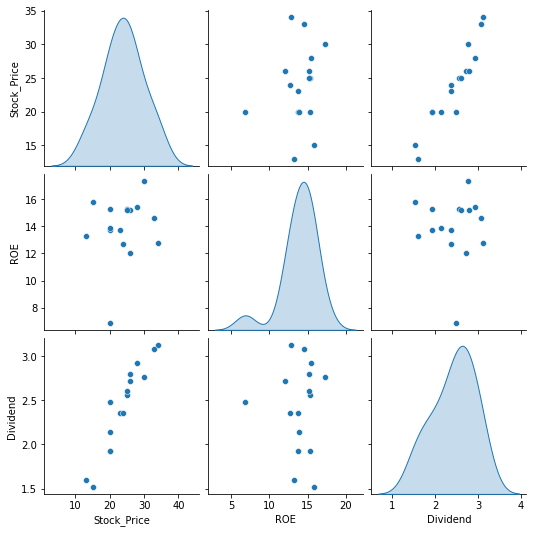

In [32]:
sns.pairplot(data = df[["Stock_Price", "ROE", "Dividend"]], 
             diag_kind='kde')
plt.show()

In [33]:
def fit_lin_reg_with_intercept(X, Y):
    X = sm.add_constant(X) # adding a constan
    reg_model = sm.OLS(Y,X).fit()
    return reg_model

In [35]:
reg_model = fit_lin_reg_with_intercept(X=df[["ROE", "Dividend"]], Y=df[["Stock_Price"]])
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Stock_Price   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     84.31
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.60e-08
Time:                        21:13:11   Log-Likelihood:                -29.298
No. Observations:                  16   AIC:                             64.60
Df Residuals:                      13   BIC:                             66.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9537      3.405     -2.923      0.0

C:\Users\kumarmanglam.thakur\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


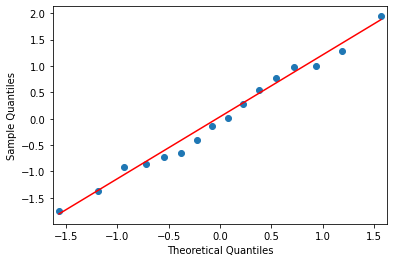

In [36]:
residuals = reg_model.resid 
sm.qqplot(residuals, fit=True, line="q")
plt.show()

### Answer
    1) Estimate the MLR equation from the given dataset
       Stock Price = -9.9537 + 0.4762 * ROE + 11.1943* Dividend
    2) Interpret the Adjusted R-Squared value. 
    Adjusted R square is the penalized R square value, for every added variable. In this case the adjusted R sqare is 91.7%, which means that even with 2 variables, variance explained after penanlizing for variables is 91.7%.
    
    3) Interpret the standard error of estimate. Does it look like the prediction will be accurate?
    The standard error of intercept is very high, as a result its p-value is insginificant. The prediction will not be very accurate, due to this. 